<a href="https://colab.research.google.com/github/ibryegen/Deep_Learning/blob/main/CAT_VS_DOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!unzip /content/drive/MyDrive/catdog/dataset.zip -d /content/dataset


Archive:  /content/drive/MyDrive/catdog/dataset.zip
   creating: /content/dataset/dataset/
   creating: /content/dataset/dataset/catdog/
   creating: /content/dataset/dataset/catdog/test/
   creating: /content/dataset/dataset/catdog/test/cats/
  inflating: /content/dataset/dataset/catdog/test/cats/1500.jpg  
  inflating: /content/dataset/dataset/catdog/test/cats/1501.jpg  
  inflating: /content/dataset/dataset/catdog/test/cats/1502.jpg  
  inflating: /content/dataset/dataset/catdog/test/cats/1503.jpg  
  inflating: /content/dataset/dataset/catdog/test/cats/1504.jpg  
  inflating: /content/dataset/dataset/catdog/test/cats/1505.jpg  
  inflating: /content/dataset/dataset/catdog/test/cats/1506.jpg  
  inflating: /content/dataset/dataset/catdog/test/cats/1507.jpg  
  inflating: /content/dataset/dataset/catdog/test/cats/1508.jpg  
  inflating: /content/dataset/dataset/catdog/test/cats/1509.jpg  
  inflating: /content/dataset/dataset/catdog/test/cats/1510.jpg  
  inflating: /content/dataset/

In [10]:
#Creating model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [11]:
model = Sequential()

#Creating CNN

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))





In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [13]:
#Compiling model


from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [14]:
# Data generation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)



In [15]:
train_directory = '/content/dataset/dataset/catdog/train'
validation_dir = '/content/dataset/dataset/catdog/validation'


In [16]:
train_generator = train_datagen.flow_from_directory(
        train_directory,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
# Training Model

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 13s 125ms/step - loss: 0.6907 - acc: 0.5278 - val_loss: 0.6836 - val_acc: 0.5830
Epoch 2/30
100/100 [==============================] - 12s 123ms/step - loss: 0.6750 - acc: 0.5793 - val_loss: 0.6734 - val_acc: 0.5680
Epoch 3/30
100/100 [==============================] - 12s 122ms/step - loss: 0.6561 - acc: 0.6183 - val_loss: 0.6613 - val_acc: 0.5600
Epoch 4/30
100/100 [==============================] - 12s 121ms/step - loss: 0.6199 - acc: 0.6563 - val_loss: 0.6133 - val_acc: 0.6680
Epoch 5/30
100/100 [==============================] - 12s 123ms/step - loss: 0.5781 - acc: 0.6898 - val_loss: 0.5955 - val_acc: 0.6770
Epoch 6/30
100/100 [==============================] - 12s 122ms/step - loss: 0.5592 - acc: 0.7079 - val_loss: 0.5920 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 12s 121ms/step - loss: 0.5375 - acc: 0.7289 - val_loss: 0.5880 - val_acc: 0.6870
Epoch 8/30
100/100 [==============================] - 1

<ipython-input-18-9df7796966d3>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


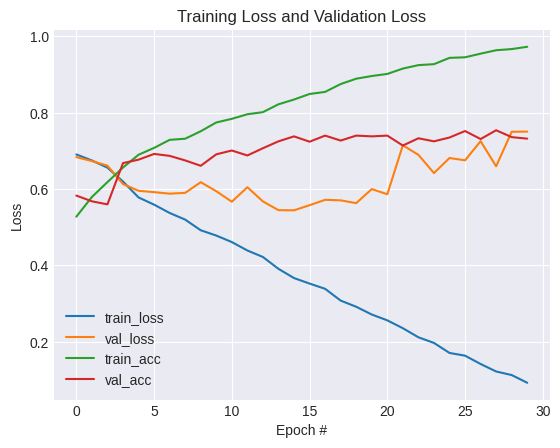

In [18]:
# Loss, Accuracy Graph

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-darkgrid")
plt.figure()


plt.plot(np.arange(0, 30), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), history.history["val_loss"], label="val_loss")


plt.plot(np.arange(0, 30), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, 30), history.history["val_acc"], label="val_acc")

plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

**Solving Overfitting Problem**

In [19]:
#Creating New Model



model_x = Sequential()

#Creating CNN

model_x.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_x.add(layers.MaxPooling2D((2, 2)))

model_x.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_x.add(layers.MaxPooling2D((2, 2)))

model_x.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_x.add(layers.MaxPooling2D((2, 2)))

model_x.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_x.add(layers.MaxPooling2D((2, 2)))

model_x.add(layers.Flatten())
model_x.add(layers.Dropout(0.4))

model_x.add(layers.Dense(512, activation='relu'))
model_x.add(layers.Dense(1, activation='sigmoid'))

model_x.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

In [20]:
model_x.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [21]:
# Image (Data) Augmentation

train_datagen_x = ImageDataGenerator(
    rescale=1/255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

validation_datagen_x = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator_x = train_datagen_x.flow_from_directory(
        train_directory,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

validation_generator_x = validation_datagen_x.flow_from_directory(
        train_directory,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

Found 1999 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.


In [23]:
history_x = model_x.fit(
      train_generator_x,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator_x,
      validation_steps=50)

print("Info: Done!")

Epoch 1/50
100/100 [==============================] - 15s 141ms/step - loss: 0.6931 - acc: 0.5094 - val_loss: 0.6910 - val_acc: 0.5200
Epoch 2/50
100/100 [==============================] - 14s 137ms/step - loss: 0.6914 - acc: 0.5228 - val_loss: 0.6847 - val_acc: 0.5063
Epoch 3/50
100/100 [==============================] - 14s 137ms/step - loss: 0.6843 - acc: 0.5425 - val_loss: 0.6876 - val_acc: 0.5512
Epoch 4/50
100/100 [==============================] - 14s 138ms/step - loss: 0.6756 - acc: 0.5804 - val_loss: 0.6619 - val_acc: 0.5875
Epoch 5/50
100/100 [==============================] - 14s 139ms/step - loss: 0.6724 - acc: 0.5716 - val_loss: 0.6782 - val_acc: 0.5487
Epoch 6/50
100/100 [==============================] - 14s 137ms/step - loss: 0.6720 - acc: 0.5741 - val_loss: 0.6611 - val_acc: 0.6075
Epoch 7/50
100/100 [==============================] - 14s 138ms/step - loss: 0.6725 - acc: 0.5816 - val_loss: 0.6440 - val_acc: 0.6300
Epoch 8/50
100/100 [==============================] - 1

<ipython-input-25-514d757d3a1e>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


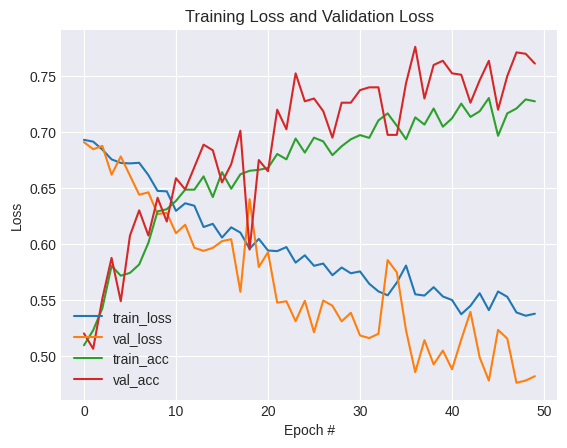

In [25]:
# Loss, Accuracy Graph

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-darkgrid")
plt.figure()


plt.plot(np.arange(0, 50), history_x.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), history_x.history["val_loss"], label="val_loss")


plt.plot(np.arange(0, 50), history_x.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), history_x.history["val_acc"], label="val_acc")

plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

In [26]:
model_x.save('model_x.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
#Prediction


from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np



model_path = '/content/model_x.h5'
prediction_model = load_model(model_path)

image_path =  "/content/dataset/dataset/catdog/test/dogs/1605.jpg"






<PIL.Image.Image image mode=RGB size=150x150 at 0x7DC8A82876D0>
(1, 150, 150, 3)


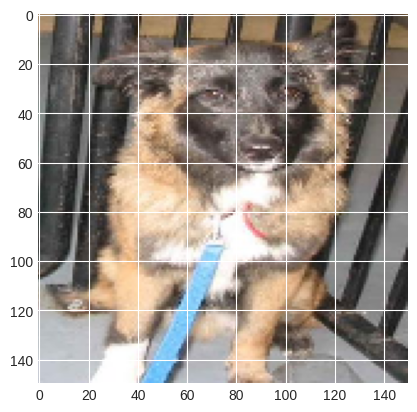

In [34]:
img = load_img(image_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

plt.imshow(img)

print(img)
print(img_array.shape)

In [35]:
train_generator_x.class_indices

{'cats': 0, 'dogs': 1}

In [40]:
result = prediction_model.predict(img_array)
print(result)


if result[0][0] == 1:
  label = "Dog"
  print("Dog")
else:
  label = "Cat"
  print("Cat")

1/1 [==============================] - 0s 31ms/step
[[1.]]
Dog


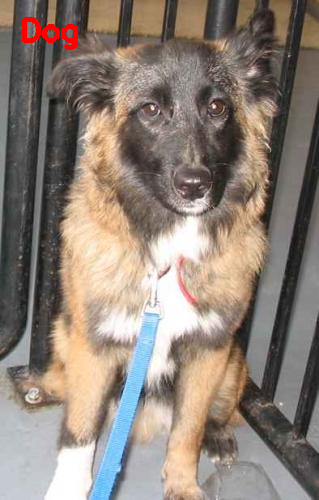

In [48]:
import cv2
from google.colab.patches import cv2_imshow

test_img = cv2.imread(image_path)

font = cv2.FONT_HERSHEY_SIMPLEX
color = (0, 0, 255)
cv2.putText(test_img, label, (20,40), font, 1.0, color, 3)

cv2_imshow(test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
